<a href="https://colab.research.google.com/github/prekshya-dawadi/GDLLabs/blob/main/Nepal_GDL_intro_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geometric Deep Learning at Nepal AI School (Introductory Notebook)

Notebook by Haitz Saez de **Ocariz** Borde, contact: chri6704@ox.ac.uk

We recommend running this notebook online on Google Colab which offers free GPU access: Click on Runtime -> Change runtime type -> Select a GPU option (T4 is okay)

*All imports should work on Google Colab, if you want to run this locally on your machine you may need to work out package installations.*

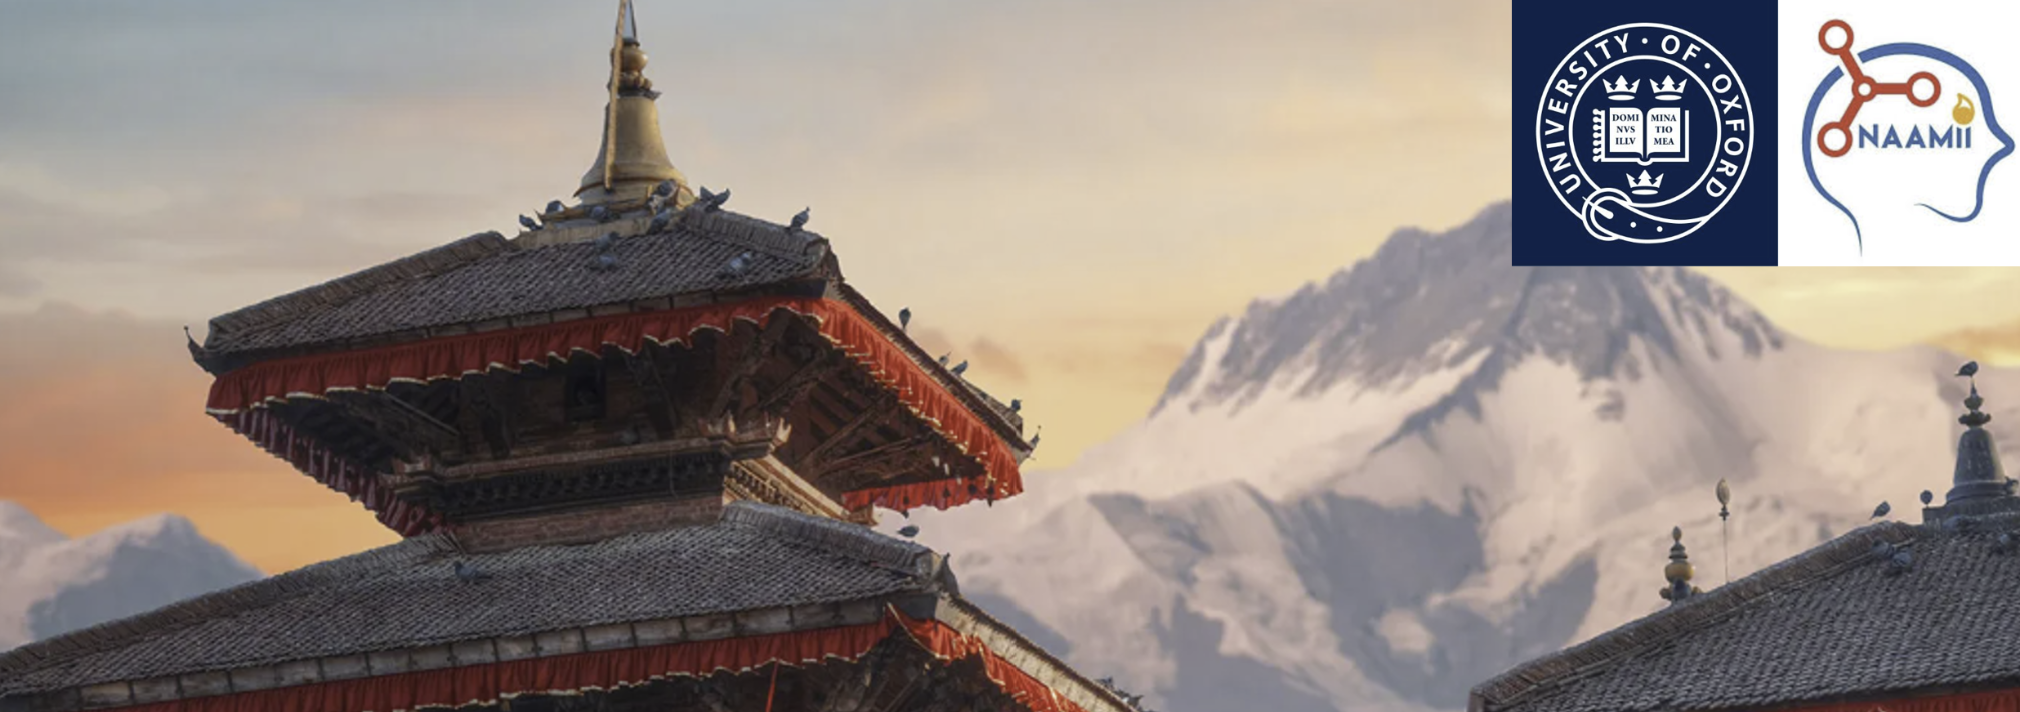

- This notebook provides an initial introduction to Geometric Deep Learning and is based on Prof. Michael Bronstein's course at the University of Oxford. We recommend that students participating in the Nepal AI School complete these exercises and attend the Q&A session that will be held before the course to get up to speed with the subject.

- We will assume basic knowledge regarding neural networks and Deep Learning and focus on the Geometric Deep Learning Blueprint and Graph Neural Networks (GNNs).

## Section 1: What is the Geometric Deep Learning Blueprint?

### Section 1.1: Different Domains and Types of Data

Traditionally, **Deep Learning has focused on Euclidean and structured data**, think for instance, of tabular data. However, the real world is much more complicated than that, and data may be presented in a lot of different domains.

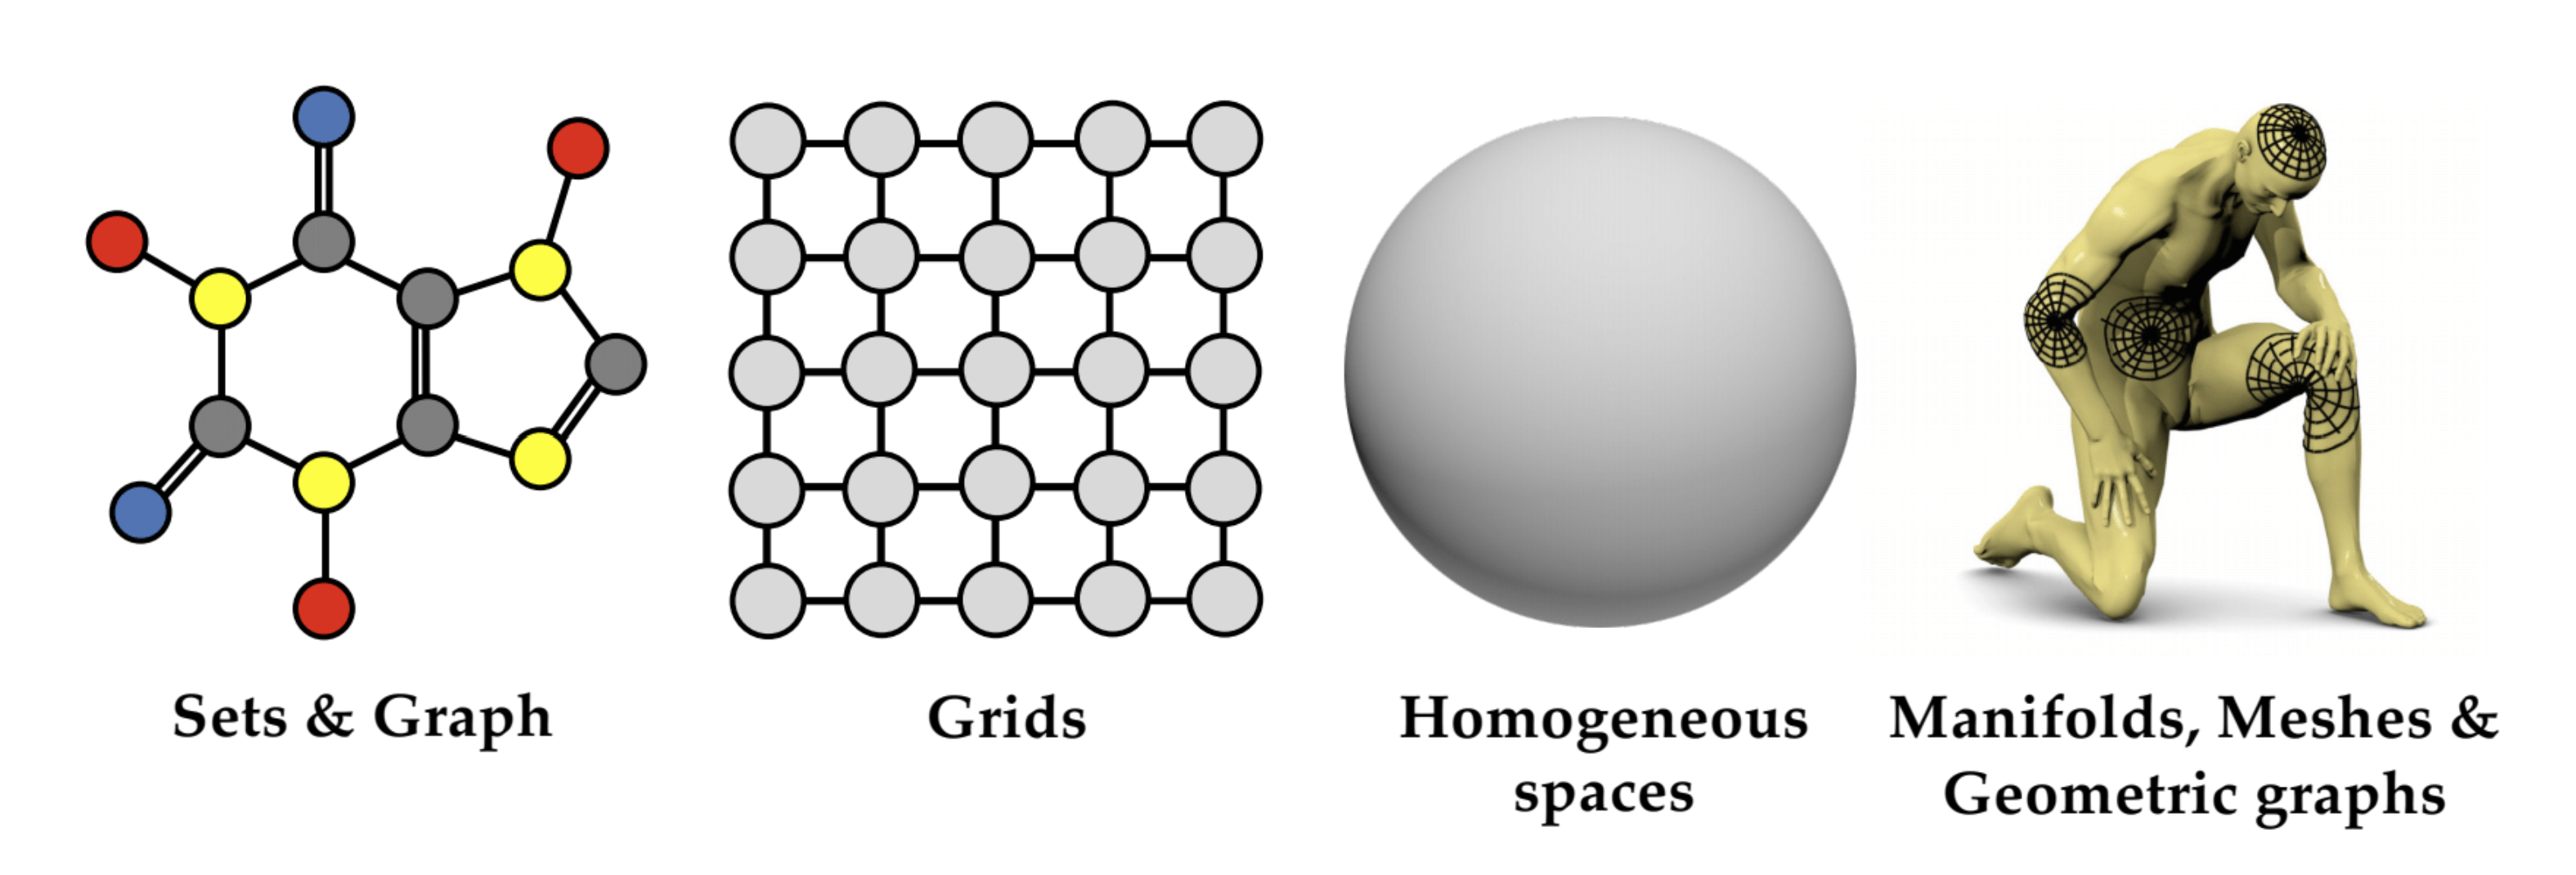

Perhaps the most natural and easiest-to-visualize example of data presented in the form of a non-regular grid can be found in biology. Molecules can be represented as graphs with nodes (atoms) and edges (bonds). *How do we adapt Deep Learning to such problems?*

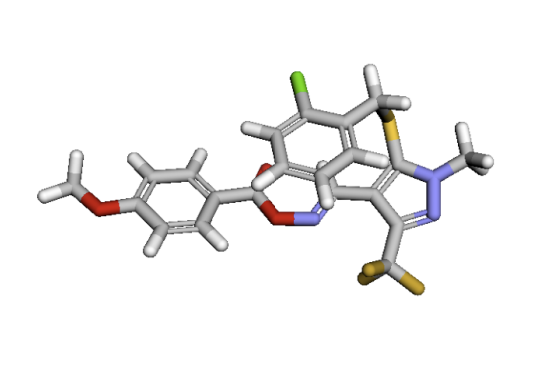

**Question 1: Have a look at the molecule/graph above, what challenges do you expect to encounter applying traditional architectures such as Multi-Layer Perceptrons (MLPs) to graphs? What kind of information may MLPs struggle to capture?**

**Your answer here:** 🤔🤔🤔🤔

The behavior of nodes in molecules or graphs like this generally are also affected by the neighborhood that they are in. In this context, would a traditional MLP be able to capture such information?

**A graph can be formally defined as a tuple $G = (V, E)$**, where:

- $V$ represents the set of nodes in the graph: It is a finite non-empty set of elements. Each element in $V$ represents a distinct object or entity.

- $E$ represents the set of edges in the graph: It is a set of ordered or unordered pairs of nodes, where each pair $(u, v)$ indicates a connection between node $u$ and node $v$. In an undirected graph, the edges are unordered pairs, meaning the connection between two nodes is bidirectional. In a directed graph (also known as a digraph), the edges are ordered pairs, indicating a one-way connection from the first node to the second node.

**Exercise 1: Let's plot a graph using the networkx package**
**(fill in the code inside ### YOUR CODE ###)** 💻💻💻💻

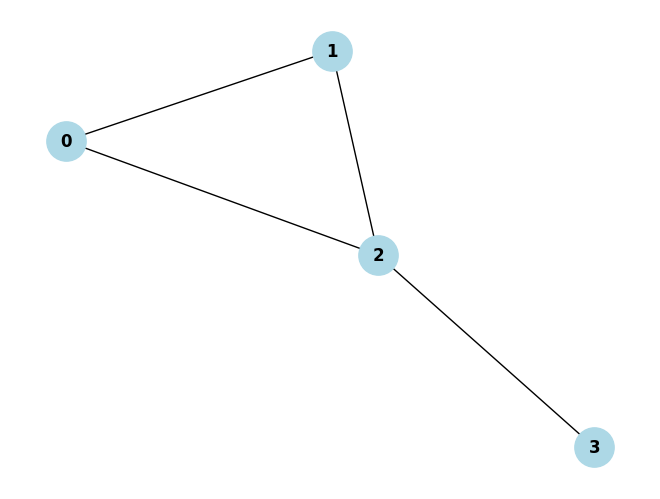

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([0, 1, 2, 3])

# Add edges
G.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 3)])

# Plot the graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=800, font_size=12, font_weight='bold')

### YOUR CODE ###
#Clue: add code to display the graph using plt
plt.show()

#################

**Exercise 2: Can you add an edge from node 3 to 1 and plot the new graph? (fill in the code inside ### YOUR CODE ###)** 💻💻💻💻

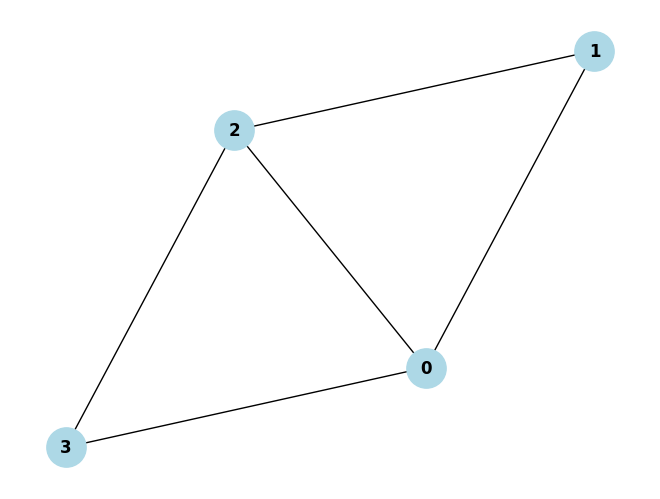

In [ ]:
### YOUR CODE ###
#Clue: add the missing edge using the similar code to that in the cell above

G.add_edges_from([(0,3)])
#################

# Plot the graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=800, font_size=12, font_weight='bold')

plt.show()

### Section 1.2: Symmetry and Group Theory

Informally, a **symmetry** of an object or a system is a **transformation** that leaves a certain **property** of said object/ system **unchanged** (or invariant).


Such transformations may be either smooth, continuous, or discrete. Symmetries
are ubiquitous in many machine learning tasks. **Depending on the domain of our data we may be interested in different symmetries.** For example, in computer
vision, if we are given a set of images in which each image represnts a certain category (image classification problem), the object category is unchanged by shifts (translations), so shifts are symmetries in
this problem. In computational chemistry, the
task of predicting properties of molecules independently of their orientation
in the space, which requires rotational invariance. Discrete symmetries emerge naturally
when describing particle systems where particles do not have canonical
ordering and thus can be arbitrarily permuted, as well as in many dynamical
systems, via the time-reversal symmetry (such as systems in detailed balance or the Newton’s second law of motion).

**Symmetry is intimidately tied to Group Theory:**

3Blue1Brown has a really nice video about this on Youtube, have a look!: https://www.youtube.com/watch?v=mH0oCDa74tE

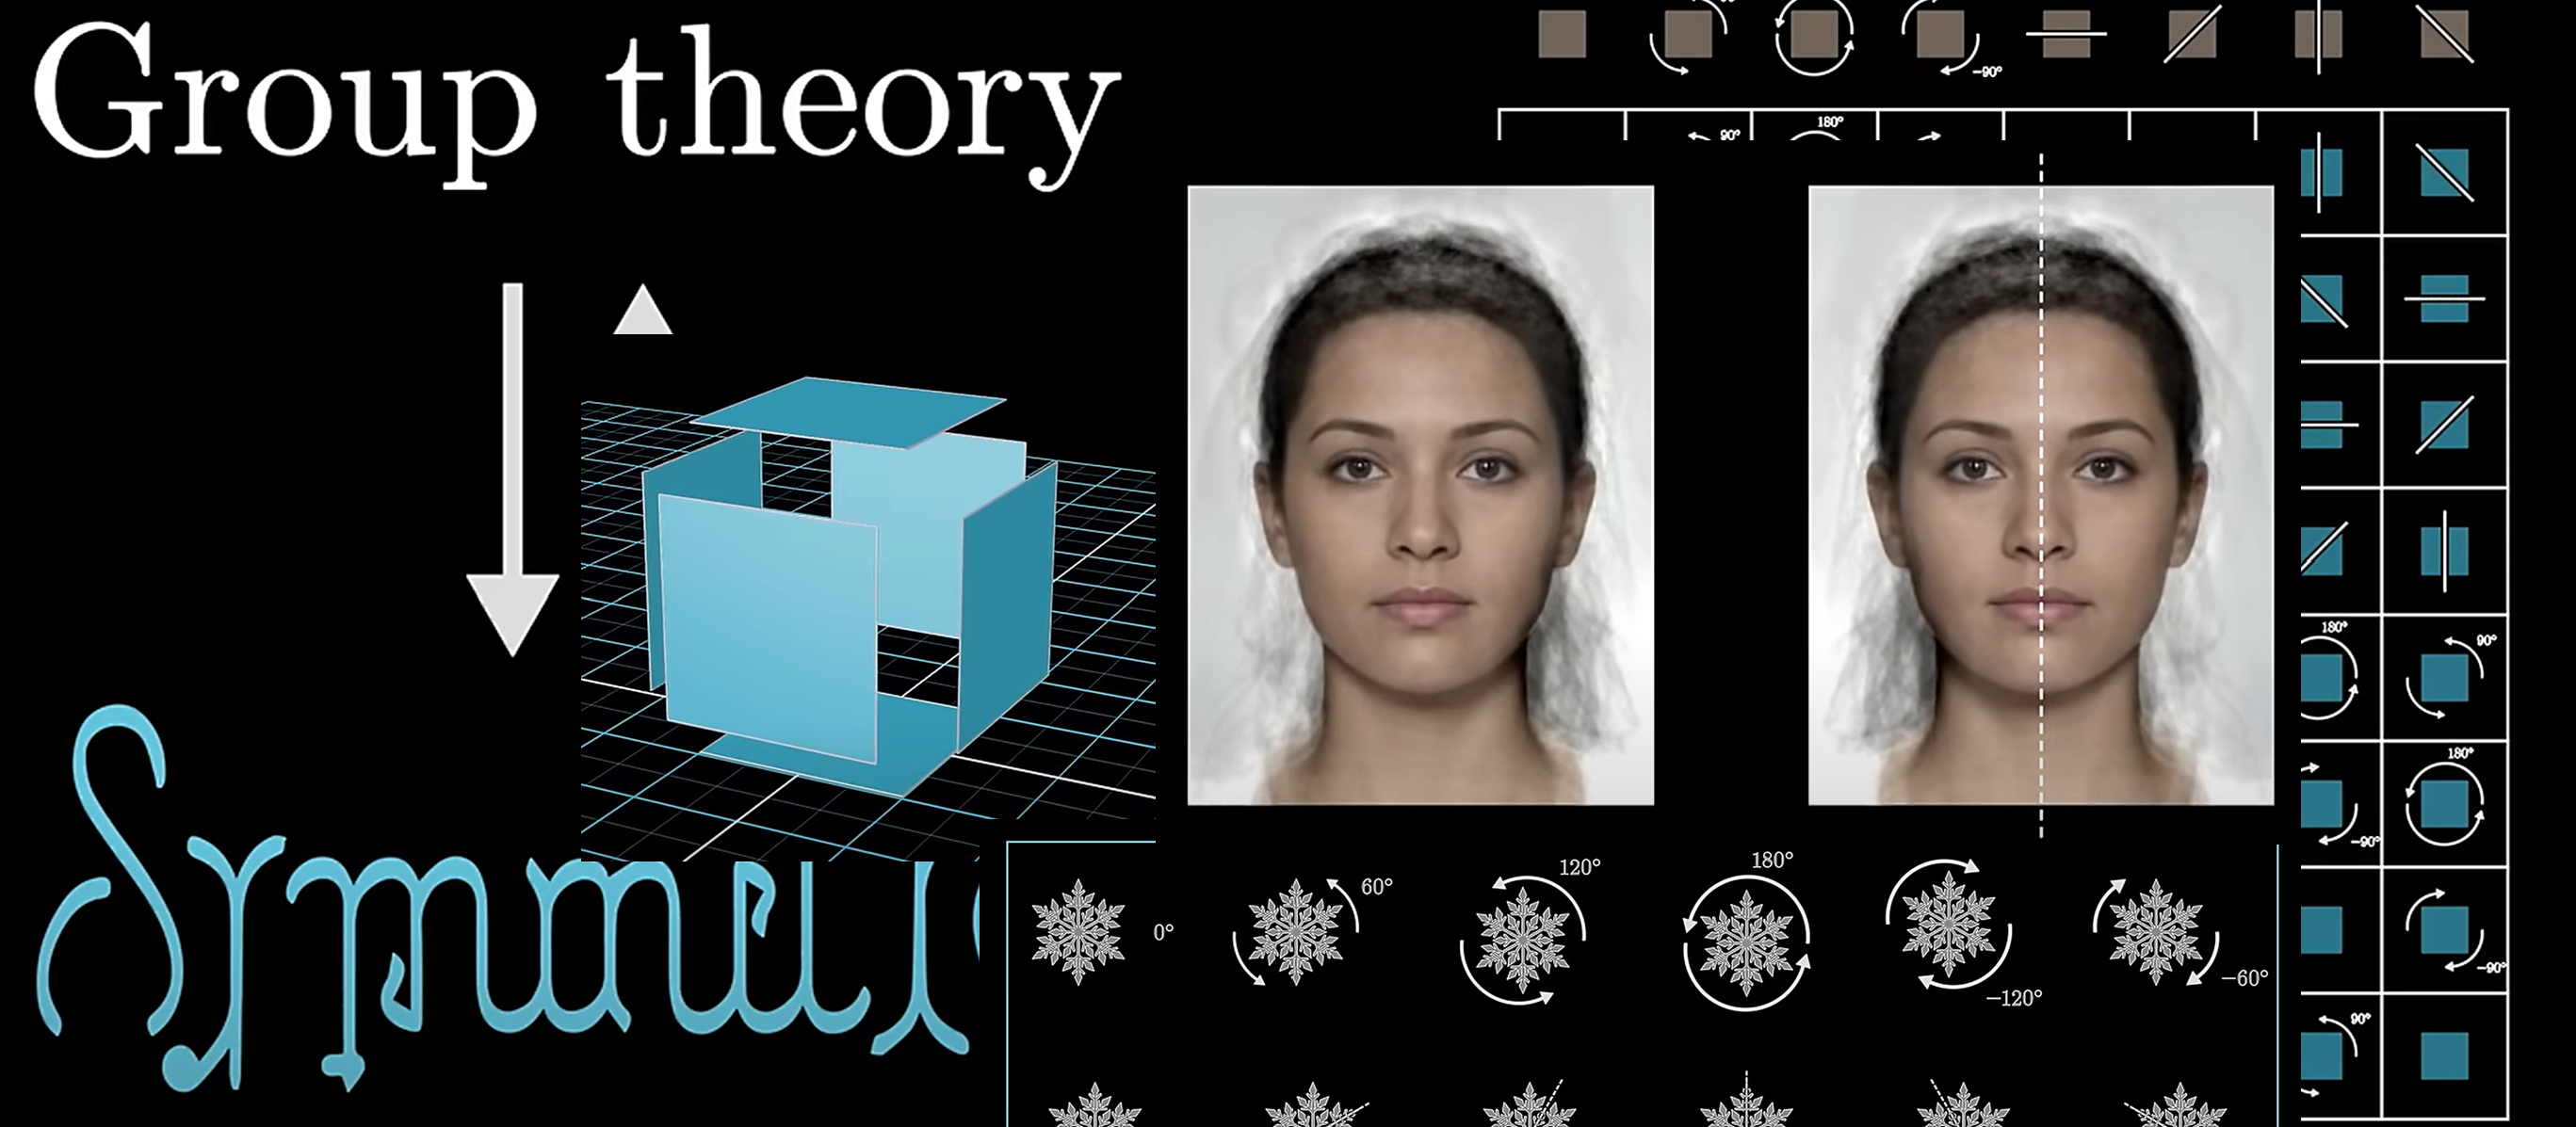

**A group can be formally defined as a tuple $H = (S, \circ)$**, where:

- $S$ represents the set of elements: It is a non-empty set of elements that could represent numbers, matrices, functions, or other mathematical objects. Each element in $S$ participates in the group operation.

- $\circ$ represents the group operation: It is a binary operation that combines two elements from $S$ to produce another element in $S$. The operation must satisfy four fundamental properties:
    - **Closure**: For all $a, b \in S$, the result of $a \circ b$ is also in $S$.
    - **Associativity**: For all $a, b, c \in S$, $(a \circ b) \circ c = a \circ (b \circ c)$.
    - **Identity element**: There exists an element $e \in S$ such that for every element $a \in S$, $a \circ e = e \circ a = a$.
    - **Inverse element**: For every element $a \in S$, there exists an element $a^{-1} \in S$ such that $a \circ a^{-1} = a^{-1} \circ a = e$, where $e$ is the identity element.

Groups are key structures in abstract algebra, often used to study symmetry, transformations, and algebraic structures.

**Question 2:**

Consider the set $S = \{0, 1, 2\}$ with the operation $\oplus$, defined as addition modulo 3. This operation is performed by adding two elements and then taking the remainder when divided by 3.

1. **Show that $ (S, \oplus) $ satisfies the closure property.**  
   Hint: You need to check if for any $ a, b \in S $, the result of $ a \oplus b \in S $.

2. **Verify that $ (S, \oplus) $ satisfies the associativity property.**  
   Hint: Show that for all $ a, b, c \in S $, $ (a \oplus b) \oplus c = a \oplus (b \oplus c) $.

3. **Identify the identity element in $ (S, \oplus) $.**  
   Hint: Find $ e \in S $ such that for any $ a \in S $, $ a \oplus e = e \oplus a = a $.

4. **Find the inverse element for each $ a \in S $ under $ \oplus $.**  
   Hint: For each $ a \in S $, find $ b \in S $ such that $ a \oplus b = b \oplus a = e $, where $ e $ is the identity element.

**Your answer here:** 🤔🤔🤔🤔

**Exercise 3:**

Write a Python function that checks if the set $S$ and the binary operation discussed above form a group.

- Implement the function `is_group(S, op)` that takes a set $S$ and a function `op(a, b)` representing the group operation.
- The function should return `True` if $ (S, op) $ forms a group, and `False` otherwise.

You can define the operation as addition modulo 3 for the set $S = \{0, 1, 2\}$ and use the function to check if $(S, \oplus)$ is a group.

**(fill in the code inside ### YOUR CODE ###)** 💻💻💻💻

In [ ]:
from itertools import product

def is_group(S, op):
    # 1. Check Closure: op(a, b) must be in S for all a, b in S
    for a, b in product(S, repeat=2):
        if op(a, b) not in S:
        ### YOUR CODE ###
          return False
        #################

    # 2. Check Associativity: op(op(a, b), c) == op(a, op(b, c)) for all a, b, c in S
    for a, b, c in product(S, repeat=3):
        if op(op(a, b), c) != op(a, op(b, c)):
        ### YOUR CODE ###
          return False
        #################

    # 3. Find Identity element e: there should be an element e such that op(a, e) == op(e, a) == a for all a in S
    ### YOUR CODE ###
    identity = None
    for e in S:
      for a in S:
        if (op(a, e) == e and op(e, a) == e) :
          identity = e
          return True
    #################

    # 4. Check Inverse element: for each a in S, there should be a b such that op(a, b) == op(b, a) == e
    for a in S:
        if not any(op(a, b) == identity and op(b, a) == identity for b in S):
            return False  # Inverse element doesn't exist for some a

    return True  # All group properties are satisfied

# Example usage: Addition modulo 3
def mod3_addition(a, b):
    return (a + b) % 3

S = {0, 1, 2}

# Check if S with mod3_addition forms a group
print(is_group(S, mod3_addition))  # Should return True

True


**Let's get a bit more practical!**

In the context of images, **translation** is a type of symmetry. If an image can be translated without altering its inherent features, this indicates that the image exhibits translation symmetry. The set of all possible translations forms a group under the operation of translation composition.

- **Convolution Operation:** In image processing, convolution with a filter (kernel) is a linear operation that captures features of the image. The convolution operation itself is equivariant to translations; that is, if we translate the image first and then apply the convolution operation, the result will be equivalent to applying the convolution operation first and then translating the output.

<!--
- **Group Theoretic Perspective:** The operation of convolution can be viewed as a mapping from the translation group to itself. Convolution with a filter performs a transformation that respects the translation symmetry. This means that if the input image is translated, the result of the convolution is similarly translated, but the features detected by the convolution (e.g., edges, textures) remain invariant in their representation. -->

Run the sample code below, to see it in action!

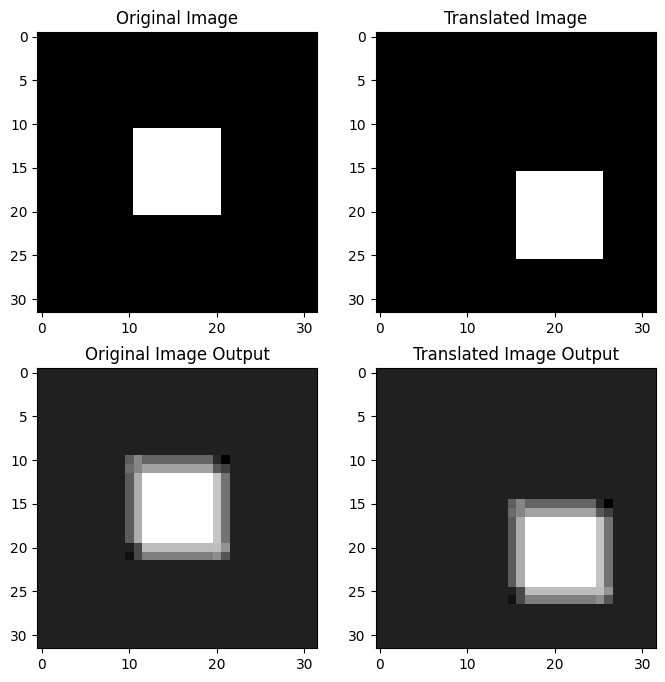

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed(42)  # Setting a random seed

# Define a simple CNN with one convolution layer
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Single convolutional layer with 1 input channel, 1 output channel, and 3x3 kernel
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        return x

# Function to visualize images
def plot_images(original, translated, output1, output2):
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    axs[0, 0].imshow(original[0, 0].cpu().detach().numpy(), cmap='gray')
    axs[0, 0].set_title("Original Image")
    axs[0, 1].imshow(translated[0, 0].cpu().detach().numpy(), cmap='gray')
    axs[0, 1].set_title("Translated Image")
    axs[1, 0].imshow(output1[0, 0].cpu().detach().numpy(), cmap='gray')
    axs[1, 0].set_title("Original Image Output")
    axs[1, 1].imshow(output2[0, 0].cpu().detach().numpy(), cmap='gray')
    axs[1, 1].set_title("Translated Image Output")
    plt.show()

# Create a simple image with a white square in the center
def create_image(size, square_size):
    img = np.zeros((size, size))
    start = (size - square_size) // 2
    img[start:start + square_size, start:start + square_size] = 1.0
    return img

# Create a translated version of the image
def translate_image(image, shift_x, shift_y):
    translated_image = np.roll(image, shift_x, axis=1)
    translated_image = np.roll(translated_image, shift_y, axis=0)
    return translated_image

# Create original and translated images
size = 32
square_size = 10
original_image = create_image(size, square_size)
translated_image = translate_image(original_image, shift_x=5, shift_y=5)

# Convert images to PyTorch tensors
original_tensor = torch.tensor(original_image).float().unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions
translated_tensor = torch.tensor(translated_image).float().unsqueeze(0).unsqueeze(0)

# Initialize CNN and perform convolution on both images
cnn = SimpleCNN()

# Forward pass through the CNN
output1 = cnn(original_tensor)
output2 = cnn(translated_tensor)

# Visualize the original, translated, and their convolution outputs
plot_images(original_tensor, translated_tensor, output1, output2)


**Question 3: If we apply a pointwise non-linear transformation such as ReLU after the convolution above, do you expect the transformation conv + ReLU to still be translation invariant?**

**Your answer here:** 🤔🤔🤔🤔

A non-linear transformation, from definition does not hold the linear property or linear combination of the basis (thinking geometrically), so it wouldn't make sense for it to still preserve translation properties after the "non-linear" transformation, would it?

**Question 4: As discussed in Section 1.1, in Geometric Deep Learning, we may work with different data types and domains. Hence, to engineer appropriate neural networks, it can be useful to consider relevant symmetries. What kind of symmetries are relevant in the context of graph data? The picture below may provide a hint!**

**Your answer here:** 🤔🤔🤔🤔

Permutations? Isomorphism?

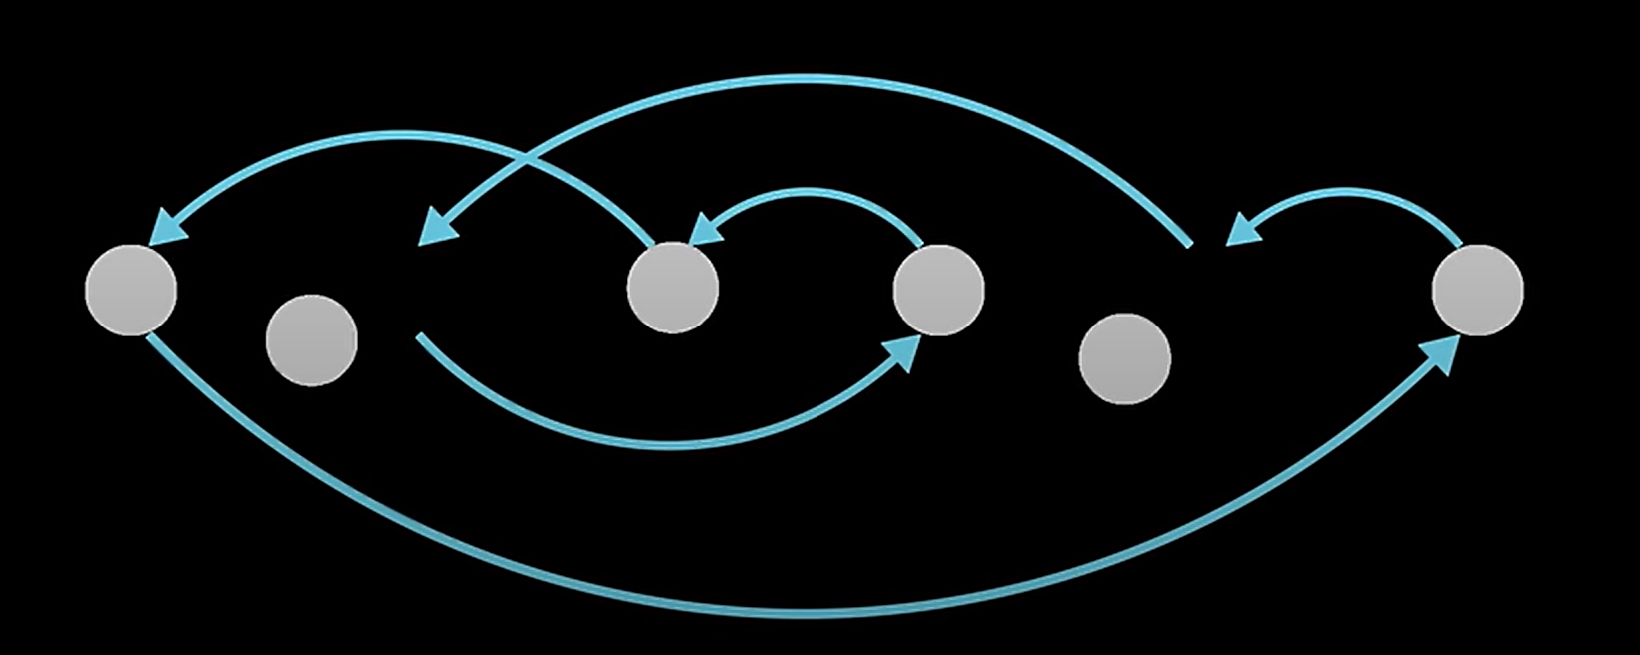

### Section 1.3: Invariance, Equivariance, and Geometric Priors

We have now developed some intuition around different data domains, symmetry, and group theory. Let us next introduce the concepts of **invariance** and **equivariance**.


Let $X(\Omega, C)$ be a set of $C$-valued signals defined on domain $\Omega$ (e.g. the set of RGB images defined on a bi-dimensional grid, $X(\Omega, C) = \{x: \mathbb{Z} \times\mathbb{Z} \rightarrow \mathbb{R}^3\}$ in this case):

- **Invariance**: A function $ f: X(\Omega, C) \rightarrow Y $ is said to be **invariant** to a transformation $ T $ if applying $ T $ to the input does not change the output of the function. Mathematically, this can be expressed as: $f(T(x)) = f(x) $. **Example**: Suppose $ f(x) $ is a function that computes the average of the values of signal $ x $. If $ T $ is a permutation of the values of $ x $, then $ f $ is invariant to permutations because the average remains the same regardless of the order of the values.

- **Equivariance**: A function $ f: X(\Omega, C) \rightarrow : X(\Omega, C) $ is said to be **equivariant** to a transformation $ T $ if applying $ T $ to the input and then applying $ f $ is equivalent to applying $ f $ and then applying $ T  $ to the output. Mathematically, this can be expressed as: $ f(T(x)) = T(f(x)) $. **Example**: Consider a function $ f $ that convolves an input signal $x$ with a filter $h$. If $ T $ is a translation operation, then $ f $ is equivariant with respect to $ T $. \\



- **Invariance** A function $ f $ is said to be **invariant** to a transformation $ T $ if applying $ T $ to the input does not change the output of the function. Mathematically, this can be expressed as: $f(T(x)) = f(x) $ for all $ x $ in the domain of $ f $. **Example**: Suppose $ f(x) $ is a function that computes the average of the elements of $ x $. If $ T $ is a permutation of the elements of $ x $, then $ f $ is invariant to permutations because the average remains the same regardless of the order of elements.

- **Equivariance** A function $ f $ is said to be **equivariant** to a transformation $ T $ if applying $ T $ to the input and then applying $ f $ is equivalent to applying $ f $ and then applying another transformation $ S $ to the output. Mathematically, this can be expressed as: $ f(T(x)) = S(f(x)) $ for all $ x $ in the domain of $ f $, where $ S $ is a transformation that corresponds to $ T $ in the output space. **Example**: Consider a function $ f $ that performs a translation on the coordinates of points in space. If $ T $ is a translation operation and $ S $ is the corresponding translation operation on the output space, then $ f $ is equivariant with respect to $ T $ and $ S $.


The concept of an **inductive bias** and a **geometric prior** are very related to invariance and equivariance.

- **Inductive bias** refers to the set of assumptions or prior knowledge that a learning algorithm incorporates to make generalizations from training data to unseen data. It essentially guides the learning process and influences the model's ability to generalize beyond the specific examples it has seen during training.
- A **geometric prior** can be considered a type of inductive bias. It is a type of prior knowledge or assumption about the geometric properties of data. It often reflects assumptions about the underlying structure, distribution, or shape of the data in a way that incorporates prior beliefs about the geometry of the problem space.

**Question 5: How are invariance, equivariance, and geometric priors related?**

**Your answer here:** 🤔🤔🤔🤔

Geometric Priors or underlying geometric assumptions about the data drives what transformations we consider invariant or equivariant?

### Section 1.4: The Blueprint

**Question 6: Next, have a look at the following screenshots from the Geometric Deep Learning book (https://arxiv.org/pdf/2104.13478), how can we relate all we have discussed so far to the Geometric Deep Learning Blueprint?**

**Your answer here:** 🤔🤔🤔🤔

As discussed earlier, Geometric Deep Learning is all about identifying symmetries in data and how we can incorporate these symmetries in data to improve model and model training. Now, symmetries essentially mean invariance to a certain operation or giving the same output irrespective of the order of transformations applied to it. In this context, invariance and equivariance could effectively be used as tools to determine the Geometric Priors of a data to help it effectively generalize all it's learned on the training set to an unseen data.

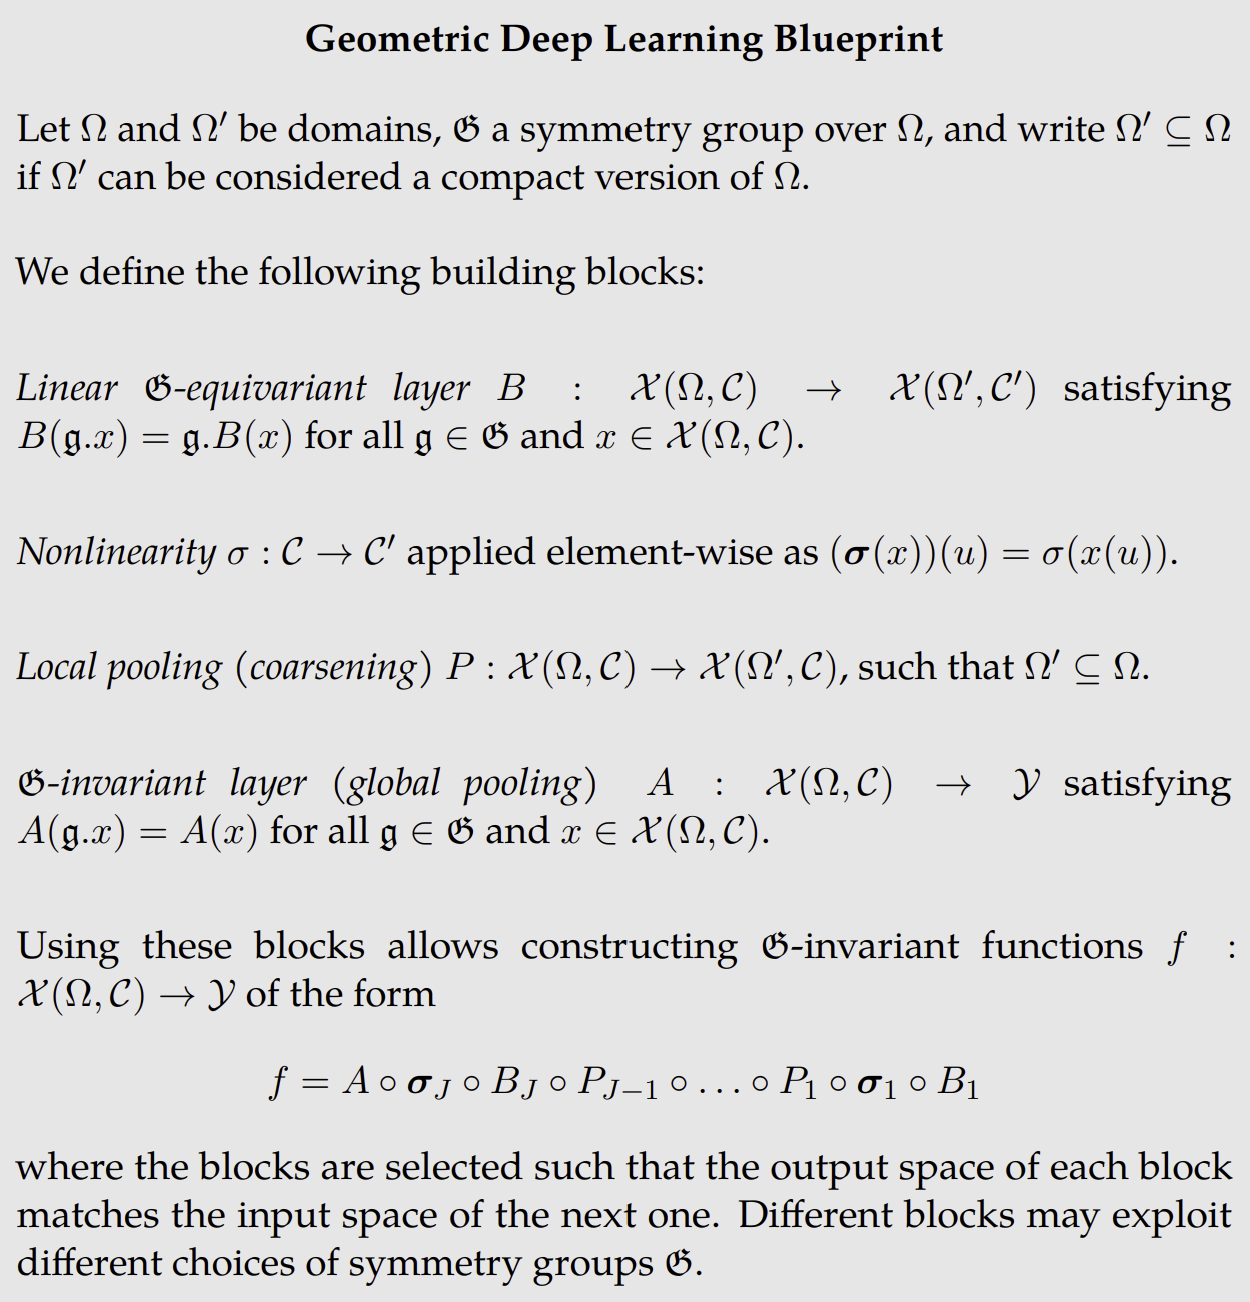

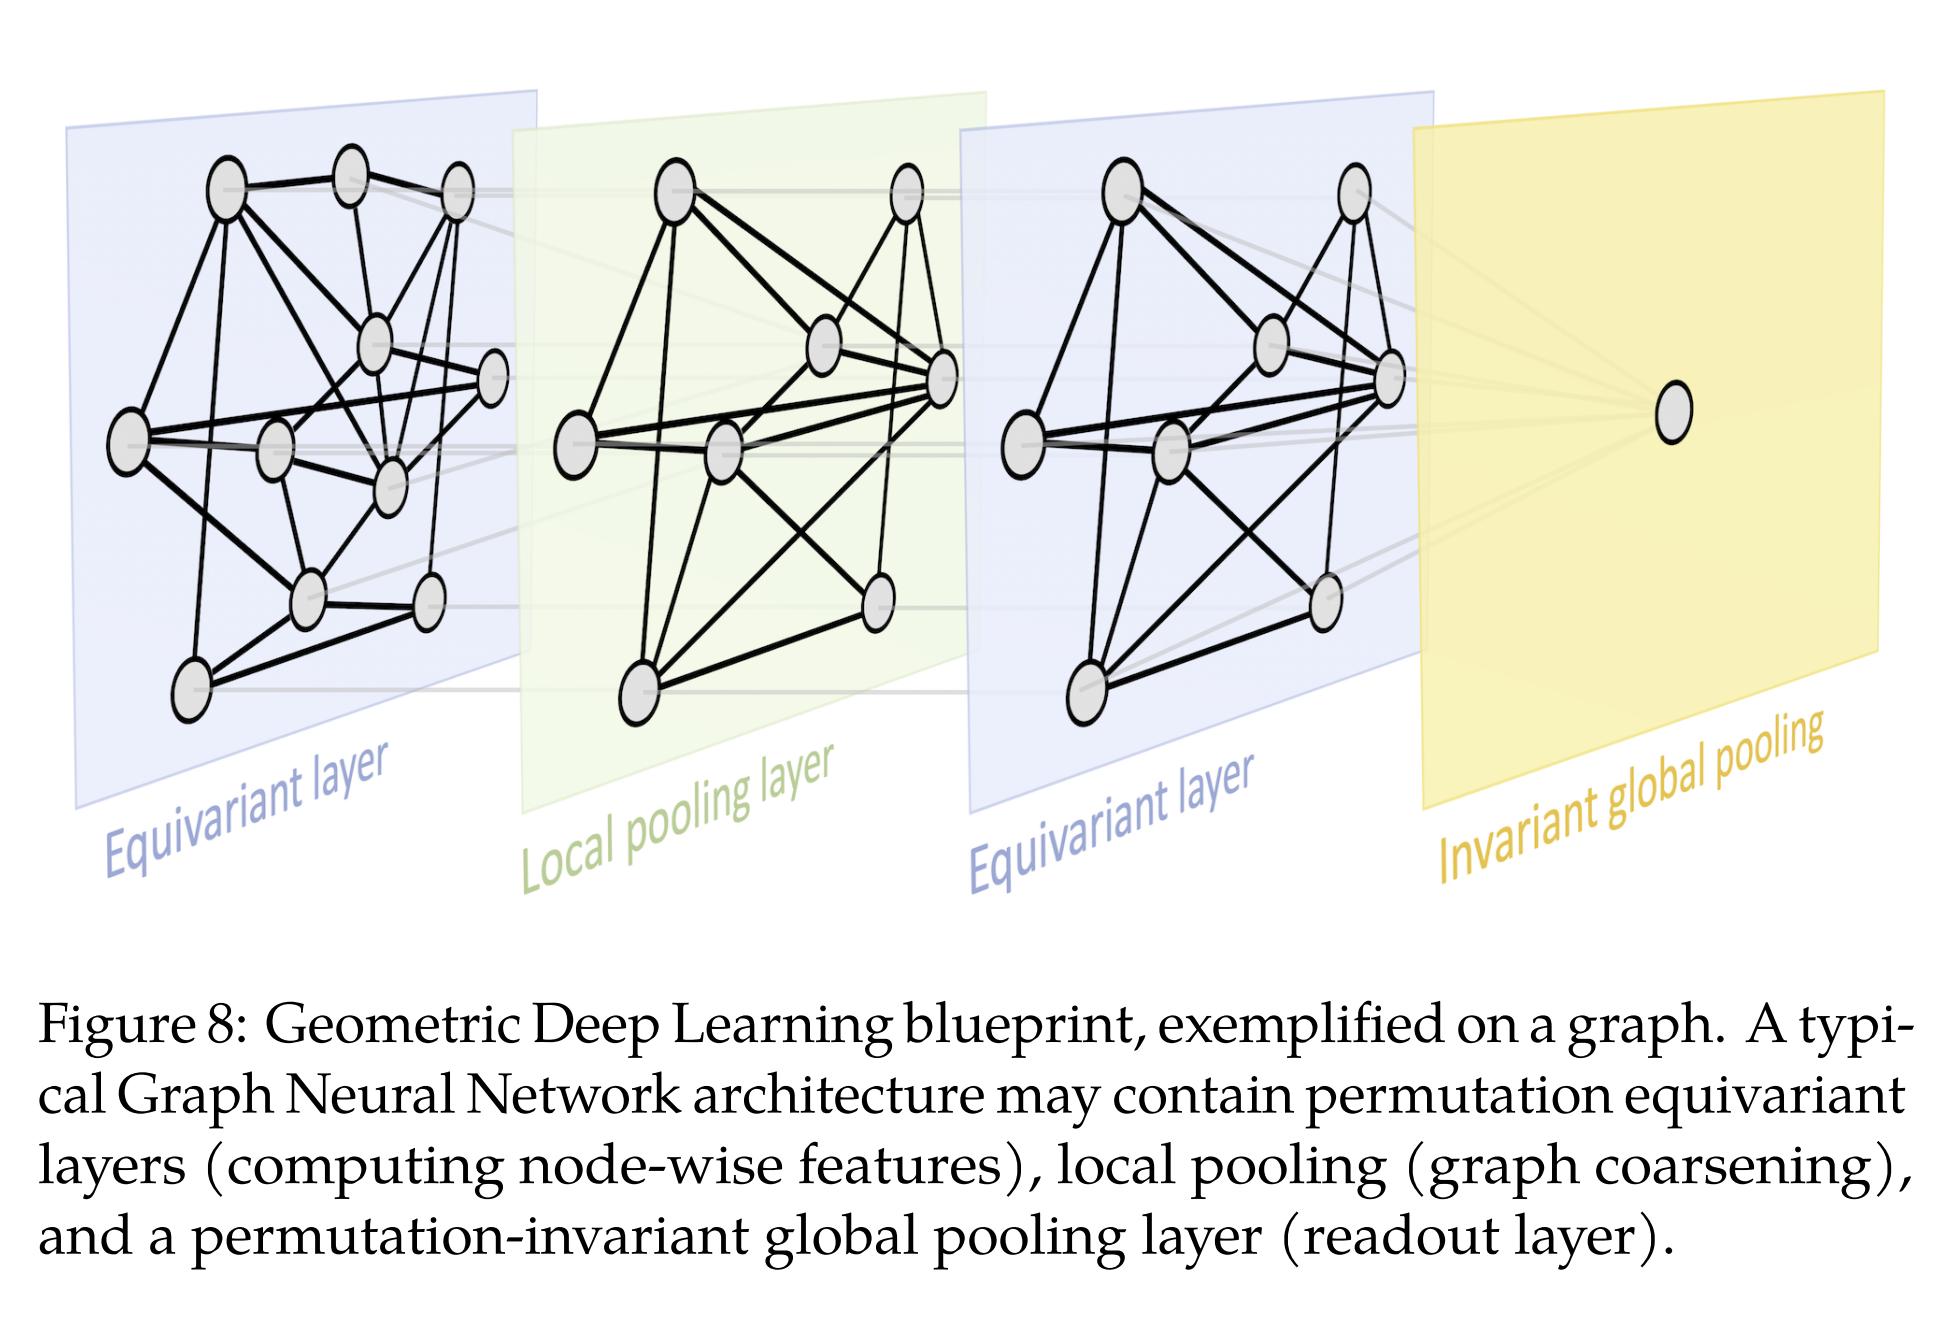

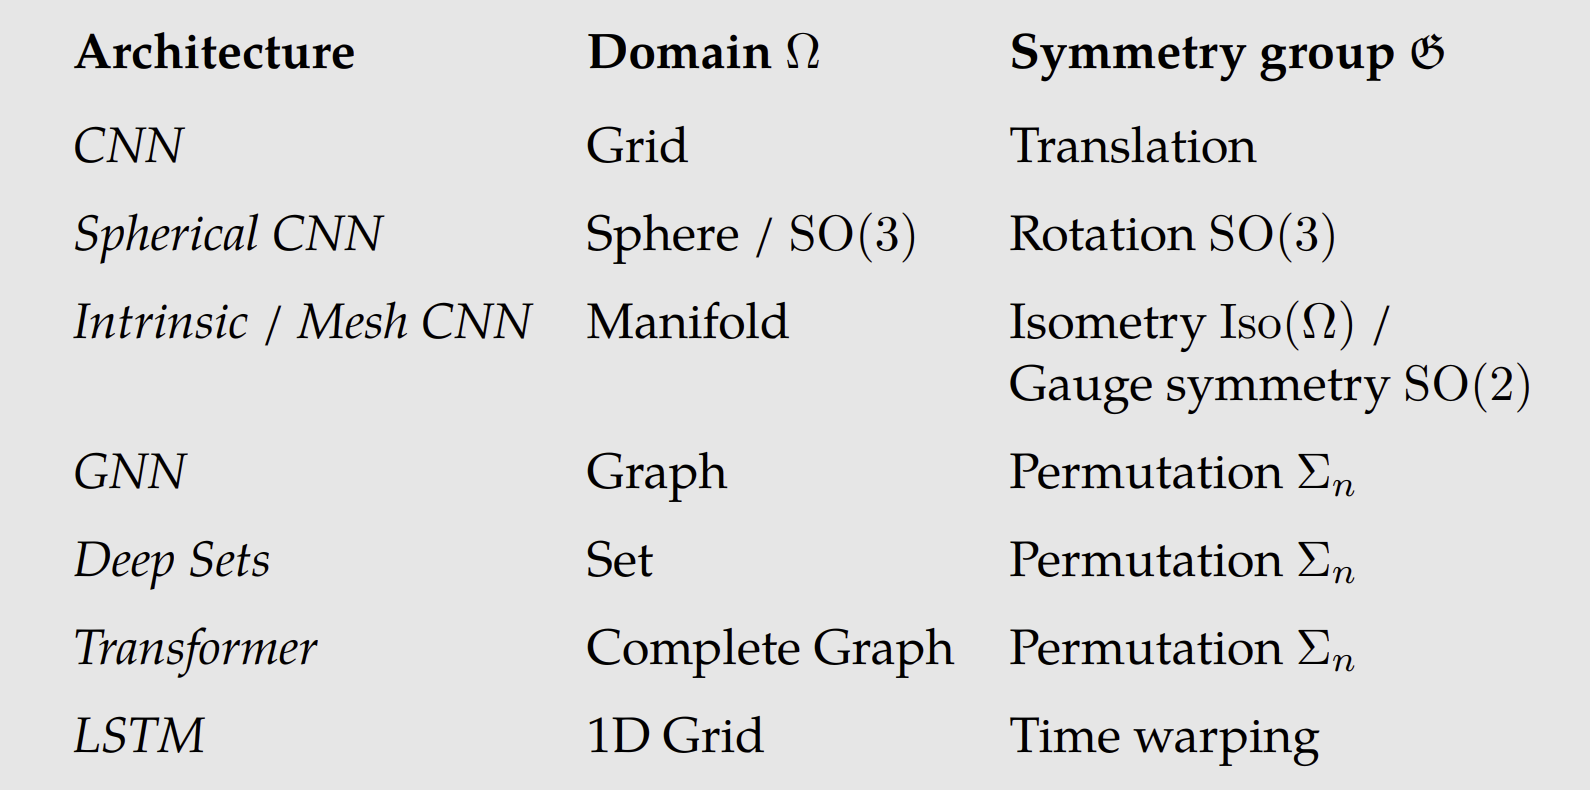

## Section 2: Introduction to Graph Neural Networks (GNNs)

### Section 2.1: The Message-Passing Framework

**Graph Neural Networks (GNNs) embody the principles of Geometric Deep Learning applied to graphs by utilizing the properties of the permutation group.** GNNs represent one of the most versatile and general classes of deep learning architectures. Many other deep learning models can be viewed as specific instances of GNNs, enhanced by additional geometric structures.

**Many GNNs work based on the message-passing framework.**


The Message Passing operation iteratively updates node features $h_i^{\ell} \in \mathbb{R}^d$ from layer $\ell$ to layer $\ell+1$ via the following equation:
$$
h_i^{\ell+1} = \phi \Bigg( h_i^{\ell}, \oplus_{j \in \mathcal{N}_i} \Big( \psi \left( h_i^{\ell}, h_j^{\ell}, e_{ij} \right) \Big) \Bigg),
$$
where $\psi, \phi$ are Multi-Layer Perceptrons (MLPs), and $\oplus$ is a permutation-invariant local neighborhood aggregation function such as summation, maximization, or averaging.

**Question 7: We can classify GNNs into three types: Convolutional, Attentional, and Message-passing, with the latter being the most general case. Based on the diagram below, can you explain how they differ? Which one do you expect to be the most expressive? Is being as expressive as possible always the best? Consider inductive biases and computational overhead.**

**Your answer here:** 🤔🤔🤔🤔

Convolutional GNN : Aggregates information based on a node's neighbors

Attentional GNN: Applies attention mechanism to determine what are the most important features from the neighborhood we need to aggregate.

Message Passing GNN: Each node gathers information from its neighbors iteratively by passing messages.

Attentional GNN maybe most expressive due to it being adaptable to different kinds of data and being able to capture importance for different contexts. However, being as expressive as possible may not always be the best, specially in cases where we have a quantified inductive bias, in which case, it could just simply be increasing the computational overhead.

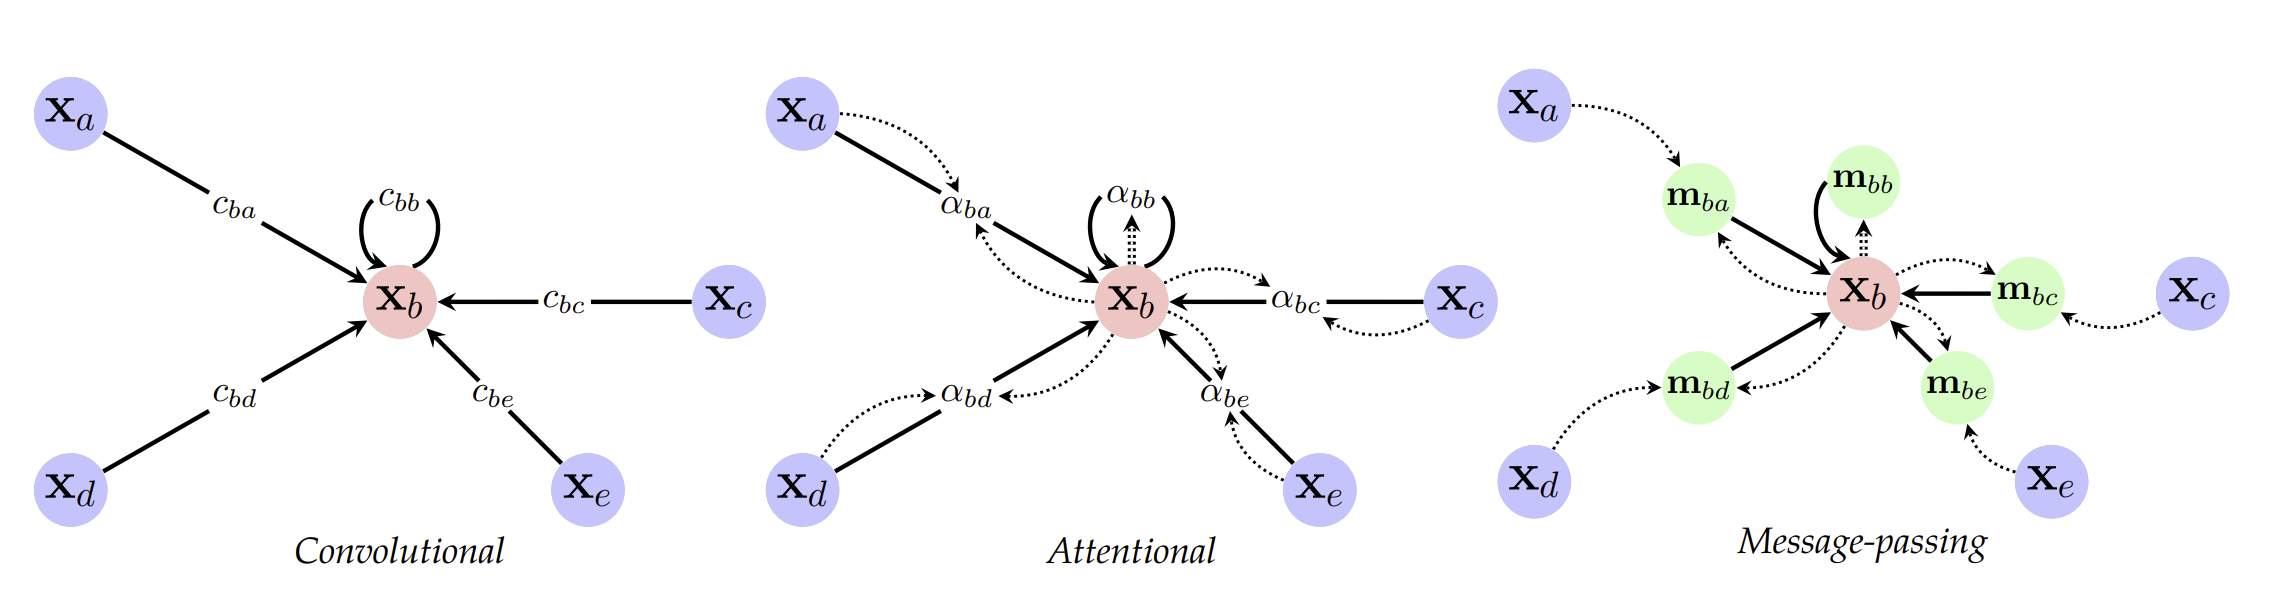

### Section 2.3: GNNs with PyTorch Geometric

**Next, we are going to learn how to work with GNNs using PyTorch Geometric!**

We briefly used the Networkx package before, which is great for visualizing graphs. However, for training our models, we would like to use a framework that allows us to efficiently handle large-scale graph data and perform various graph-related computations. This is where **PyTorch Geometric** (PyG) comes in. PyG is a library built on top of PyTorch that provides tools to work with GNNs. It simplifies the process of implementing and training GNNs by offering easy-to-use data structures and a wide range of pre-built layers and models for graph-related tasks.

With PyG, we can:
- Efficiently represent graph data.
- Implement various GNN architectures, such as Graph Convolutional Networks (GCNs), Graph Attention Networks (GATs), and many others.
- Perform tasks like node classification, graph classification, and link prediction.

In the following sections, we will dive into how to create and train GNN models using PyTorch Geometric, leveraging its powerful utilities to accelerate our work with graph-structured data!

Run the following installs:

In [ ]:
# Check PyTorch version installed on this system
!python -c "import torch; print(torch.__version__)"

2.5.1+cu121


In [ ]:
# Download the corresponding PyTorch Geometric module
%%capture
"""
Assign to TORCH with what you get from the cell above. E.g., export TORCH=2.1.0+cu118
"""
%env TORCH=2.1.0+cu118
!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install torch-geometric

Let's create a graph data object:

In [ ]:
from torch_geometric.data import Data
import torch

# define node features
x = torch.tensor([[-1], [0], [1]])

# define edge list
edge_index = torch.tensor([[0, 1, 1, 2], [1, 0, 2, 1]], dtype=torch.long)

# create graph data object
data = Data(x=x, edge_index=edge_index)
print(data)

/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
/usr/local/lib/python3.10/dist-packages/torch_geometric/typing.py:124: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.10/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev
  warnings.warn(f"An issue occurred while importing 'torch-sparse'. "


Data(x=[3, 1], edge_index=[2, 4])


**Question 8: How many nodes and how many edges does our graph defined above have?**

**Your answer here:** 🤔🤔🤔🤔

Number of nodes = 3

Number of edges = 4

Next, let's load Cora. Cora is a well-known citation network in the GNN community. It is a bit outdated by now, but it will be good for learning.

In [ ]:
from torch_geometric.datasets import Planetoid

dataset = Planetoid(root='tmp/Cora', name='Cora')

# number of graphs
print("Number of graphs: ", len(dataset))

# number of features
print("Number of features: ", dataset.num_features)

# number of classes
print("Number of classes: ", dataset.num_classes)

# select the first graph
data = dataset[0]

# number of nodes
print("Number of nodes: ", data.num_nodes)

# number of edges
print("Number of edges: ", data.num_edges)

# check if directed
print("Is directed: ", data.is_directed())

Processing...


Number of graphs:  1
Number of features:  1433
Number of classes:  7
Number of nodes:  2708
Number of edges:  10556
Is directed:  False


Done!


In [ ]:
# number of training nodes

print("Number of training nodes", dataset.train_mask.sum())

# number of validation nodes

print("Number of validation nodes", dataset.val_mask.sum())

# number of test nodes

print("Number of test nodes", dataset.test_mask.sum())

Number of training nodes tensor(140)
Number of validation nodes tensor(500)
Number of test nodes tensor(1000)


In [ ]:
from torch_geometric.utils import to_dense_adj

print('Train mask:')
print(data.train_mask)
print('Edge index:')
print(data.edge_index)
print('Adjacency matrix')
print(to_dense_adj(data.edge_index))

Train mask:
tensor([ True,  True,  True,  ..., False, False, False])
Edge index:
tensor([[ 633, 1862, 2582,  ...,  598, 1473, 2706],
        [   0,    0,    0,  ..., 2707, 2707, 2707]])
Adjacency matrix
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 1., 0.]]])


As seen in the output of the cell above, Cora is a single graph with around 2.7k nodes and 10.5k edges. In this dataset, we perform transductive learning, meaning that part of the Cora graph is annotated during training. The goal is to train a GNN model capable of propagating and predicting the labels of unannotated nodes in the graph.

To do so, we are going to use a shallow Graph Convolutional Network (GCN) architecture (https://arxiv.org/abs/1609.02907). Although we could reimplement the GCN layer from scratch let's try to keep it simple for now! Actully, PyG already has the layer built-in and we can just import it. Run the code below to get the necessary imports. The `GCNConv` class is equivalent to one GCN layer.

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

**Question 9: Write down and explain the update equation for a single GCN layer:  (https://arxiv.org/abs/1609.02907)**

**Your answer here:** 🤔🤔🤔🤔]



**Exercise 4: Let's code our first GCN. We are only going to use 2 `GCNConv`s in this case**
**(fill in the code inside ### YOUR CODE ###)** 💻💻💻💻

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, num_features, num_classes, dropout_p=0.8):
        super().__init__()
        self.dropout_p = dropout_p
        self.conv1 = GCNConv(num_features, 16)
        ### YOUR CODE ###
        self.relu = torch.nn.ReLU()
        self.conv2 = GCNConv(16, num_classes)
        #################

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p=self.dropout_p)
        x = self.conv2(x, edge_index)
        return x

Next we are going to use the GCN in the trianing loop. Extract dataset info:

In [ ]:
# Specify device --> Run on GPU if possible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare your data
data = dataset[0].to(device)
num_features = data.num_features
num_classes = dataset.num_classes  # Ensure dataset provides num_classes

Initialize the model:

In [ ]:
# Initialize the model
torch.manual_seed(42)  # Setting a random seed
model = GCN(num_features, num_classes).to(device)

Set up optimizer so that model parameters are updated during training and set model to train mode:

In [ ]:
# Set up optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Train the model
model.train()

GCN(
  (conv1): GCNConv(1433, 16)
  (relu): ReLU()
  (conv2): GCNConv(16, 7)
)

In [ ]:
# Function for computing accuracy
def compute_accuracy(pred_y, y):
    return (pred_y == y).sum().item()

Okay, let's train the model! You should see that as the model gets trained the loss generally goes down and the accuracy goes up.

In [ ]:
# Training loop
losses = []
accuracies = []
criterion = torch.nn.CrossEntropyLoss()
for epoch in range(100):

    # Clean gradients
    optimizer.zero_grad()

    # Forward pass
    out = model(data)

    # Compute loss function based on cross-entropy
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    softmax_out = F.softmax(out, dim=1)
    pred_y = softmax_out.argmax(dim=1)
    correct = compute_accuracy(pred_y[data.train_mask], data.y[data.train_mask])
    acc = correct / data.train_mask.sum().item()

    losses.append(loss.item())
    accuracies.append(acc)

    loss.backward()
    optimizer.step()

    if (epoch+1) % 2 == 0:
        print('Epoch: {}, Loss: {:.4f}, Training Acc: {:.4f}'.format(epoch+1, loss.item(), acc))


Epoch: 2, Loss: 1.8533, Training Acc: 0.2571
Epoch: 4, Loss: 1.6777, Training Acc: 0.4786
Epoch: 6, Loss: 1.4707, Training Acc: 0.6286
Epoch: 8, Loss: 1.3308, Training Acc: 0.6143
Epoch: 10, Loss: 1.1804, Training Acc: 0.6929
Epoch: 12, Loss: 1.0853, Training Acc: 0.7357
Epoch: 14, Loss: 0.8927, Training Acc: 0.7143
Epoch: 16, Loss: 0.8435, Training Acc: 0.7286
Epoch: 18, Loss: 0.7000, Training Acc: 0.8429
Epoch: 20, Loss: 0.5954, Training Acc: 0.8714
Epoch: 22, Loss: 0.5447, Training Acc: 0.8500
Epoch: 24, Loss: 0.5092, Training Acc: 0.8643
Epoch: 26, Loss: 0.4446, Training Acc: 0.8786
Epoch: 28, Loss: 0.4329, Training Acc: 0.8643
Epoch: 30, Loss: 0.4525, Training Acc: 0.8500
Epoch: 32, Loss: 0.4223, Training Acc: 0.8429
Epoch: 34, Loss: 0.4282, Training Acc: 0.8429
Epoch: 36, Loss: 0.3660, Training Acc: 0.8643
Epoch: 38, Loss: 0.3756, Training Acc: 0.9143
Epoch: 40, Loss: 0.3965, Training Acc: 0.8857
Epoch: 42, Loss: 0.3346, Training Acc: 0.9071
Epoch: 44, Loss: 0.2329, Training Acc:

Let's visualize the results!

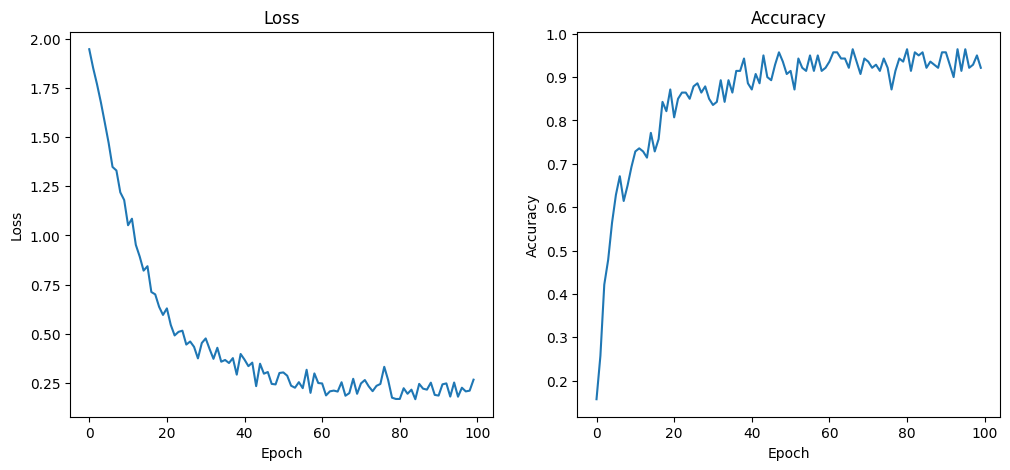

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

**Exercise 5: Evaluate the model on the test set using the mask `data.test_mask`**
**(fill in the code inside ### YOUR CODE ###)** 💻💻💻💻

In [ ]:
# Evaluate the model on test set
model.eval()
with torch.no_grad():
    out = model(data)
    softmax_out = F.softmax(out, dim=1)
    pred = softmax_out.argmax(dim=1)
    ### YOUR CODE ###

    #################

    acc = correct / data.test_mask.sum().item()  # Convert to scalar
    print(f'Accuracy: {acc:.4f}')

**Exercise 6: Tweak the original GNN architecture and see if you can get better test accuracy. Add the validation set to the training loop printing script to inform your hyperparameter tuning: you can experiment with adding more layers, or changing the dropout probability for instance.** 💻💻💻💻